In [2]:
import pandas as pd
from pycaret.classification import *

# 설정 
* cat, combine

In [ ]:
# 제출 점수 : 0.6411923454(2021-12-14 13:57:44)

# 데이터 불러오기

In [3]:
train = pd.read_csv('../data/train.csv')
test = pd.read_csv('../data/test.csv')

# 데이터 확인

In [4]:
train.head()

,id,d_l_match_yn,d_m_match_yn,d_s_match_yn,h_l_match_yn,h_m_match_yn,h_s_match_yn,person_attribute_a,person_attribute_a_1,person_attribute_b,person_prefer_c,person_prefer_d_1,person_prefer_d_2,person_prefer_d_3,person_prefer_e,person_prefer_f,person_prefer_g,person_prefer_h_1,person_prefer_h_2,person_prefer_h_3,contents_attribute_i,contents_attribute_a,contents_attribute_j_1,contents_attribute_j,contents_attribute_c,contents_attribute_k,contents_attribute_l,contents_attribute_d,contents_attribute_m,contents_attribute_e,contents_attribute_h,person_rn,contents_rn,contents_open_dt,target
0,0,True,True,True,False,False,False,1,4,3,5,275,370,369,8,1,1,4,95,59,3,3,10,2,1,2,1608,275,1,4,139,618822,354805,2020-01-17 12:09:36,1
1,1,False,False,False,True,True,False,1,3,4,1,114,181,175,4,1,1,131,101,96,1,3,5,1,1,2,1608,275,1,4,133,571659,346213,2020-06-18 17:48:52,0
2,2,False,False,False,True,False,False,2,0,3,5,464,175,452,3,1,1,54,263,56,3,1,10,2,1,1,1600,94,1,4,53,399816,206408,2020-07-08 20:00:10,0
3,3,False,False,False,True,False,False,2,0,2,5,703,705,704,3,1,1,72,227,2,1,3,5,1,1,2,1608,275,5,3,74,827967,572323,2020-01-13 18:09:34,0
4,4,True,True,True,False,False,False,1,3,4,5,275,370,369,4,1,1,214,210,209,1,1,10,2,1,2,1608,275,1,4,74,831614,573899,2020-03-09 20:39:22,0


In [5]:
test.head()

,id,d_l_match_yn,d_m_match_yn,d_s_match_yn,h_l_match_yn,h_m_match_yn,h_s_match_yn,person_attribute_a,person_attribute_a_1,person_attribute_b,person_prefer_c,person_prefer_d_1,person_prefer_d_2,person_prefer_d_3,person_prefer_e,person_prefer_f,person_prefer_g,person_prefer_h_1,person_prefer_h_2,person_prefer_h_3,contents_attribute_i,contents_attribute_a,contents_attribute_j_1,contents_attribute_j,contents_attribute_c,contents_attribute_k,contents_attribute_l,contents_attribute_d,contents_attribute_m,contents_attribute_e,contents_attribute_h,person_rn,contents_rn,contents_open_dt
0,0,True,False,False,True,True,True,1,1,2,1,857,851,1227,4,1,1,263,56,49,1,3,10,2,1,2,1147,839,1,5,263,393790,236865,2020-12-01 02:24:18
1,1,False,False,False,True,False,False,2,0,2,2,683,1086,662,2,1,1,258,263,49,1,3,5,1,1,2,1611,278,1,4,263,394058,236572,2020-12-17 05:42:53
2,2,True,False,False,True,True,True,2,3,2,1,514,790,1233,0,1,1,177,170,171,3,3,3,1,1,2,1817,490,3,4,177,1002061,704612,2020-12-10 23:33:41
3,3,True,False,False,True,True,True,1,2,2,5,114,181,175,4,1,1,177,170,171,3,3,5,1,1,2,101,150,5,3,177,1000813,704652,2020-12-03 19:44:55
4,4,True,False,False,True,False,False,1,6,4,5,1082,1078,1056,5,1,1,178,177,4,3,1,5,1,1,1,985,1097,1,4,177,111146,704413,2020-12-11 21:24:34


# 필요 데이터 추출

모델 학습시 id는 제외해야하고

contents_open_dt, person_rn, contents_rn 제거하고 진행

In [6]:
train = train.drop(['id', 'contents_open_dt', 'person_rn', 'contents_rn'], axis=1) 
test = test.drop(['id', 'contents_open_dt', 'person_rn', 'contents_rn'], axis=1)

In [7]:
train.head()

,d_l_match_yn,d_m_match_yn,d_s_match_yn,h_l_match_yn,h_m_match_yn,h_s_match_yn,person_attribute_a,person_attribute_a_1,person_attribute_b,person_prefer_c,person_prefer_d_1,person_prefer_d_2,person_prefer_d_3,person_prefer_e,person_prefer_f,person_prefer_g,person_prefer_h_1,person_prefer_h_2,person_prefer_h_3,contents_attribute_i,contents_attribute_a,contents_attribute_j_1,contents_attribute_j,contents_attribute_c,contents_attribute_k,contents_attribute_l,contents_attribute_d,contents_attribute_m,contents_attribute_e,contents_attribute_h,target
0,True,True,True,False,False,False,1,4,3,5,275,370,369,8,1,1,4,95,59,3,3,10,2,1,2,1608,275,1,4,139,1
1,False,False,False,True,True,False,1,3,4,1,114,181,175,4,1,1,131,101,96,1,3,5,1,1,2,1608,275,1,4,133,0
2,False,False,False,True,False,False,2,0,3,5,464,175,452,3,1,1,54,263,56,3,1,10,2,1,1,1600,94,1,4,53,0
3,False,False,False,True,False,False,2,0,2,5,703,705,704,3,1,1,72,227,2,1,3,5,1,1,2,1608,275,5,3,74,0
4,True,True,True,False,False,False,1,3,4,5,275,370,369,4,1,1,214,210,209,1,1,10,2,1,2,1608,275,1,4,74,0


# 모델 학습/예측

catboost 사용

In [8]:
ex = setup(train, target='target', n_jobs=3, session_id=0, silent=True, combine_rare_levels=True, fold=5, fold_shuffle=True, verbose=False)

Text(value="Following data types have been inferred automatically, if they are correct press enter to continue…

,Data Type
d_l_match_yn,Categorical
d_m_match_yn,Categorical
d_s_match_yn,Categorical
h_l_match_yn,Categorical
h_m_match_yn,Categorical
h_s_match_yn,Categorical
person_attribute_a,Categorical
person_attribute_a_1,Categorical
person_attribute_b,Categorical
person_prefer_c,Categorical


In [9]:
cat = create_model('catboost')
# 4m 57s

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.6192,0.6688,0.6654,0.6088,0.6358,0.2384,0.2395
1,0.6226,0.6710,0.6712,0.6115,0.6399,0.2453,0.2464
2,0.6243,0.6749,0.6731,0.6130,0.6416,0.2487,0.2499
3,0.6244,0.6731,0.6739,0.6129,0.6420,0.2489,0.2501
4,0.6224,0.6707,0.6726,0.6109,0.6403,0.2448,0.2460
Mean,0.6226,0.6717,0.6712,0.6114,0.6399,0.2452,0.2464
SD,0.0019,0.0021,0.0031,0.0015,0.0022,0.0038,0.0039


In [10]:
pred = predict_model(cat, test)

In [11]:
pred.head()

,d_l_match_yn,d_m_match_yn,d_s_match_yn,h_l_match_yn,h_m_match_yn,h_s_match_yn,person_attribute_a,person_attribute_a_1,person_attribute_b,person_prefer_c,...,contents_attribute_j,contents_attribute_c,contents_attribute_k,contents_attribute_l,contents_attribute_d,contents_attribute_m,contents_attribute_e,contents_attribute_h,Label,Score
0,True,False,False,True,True,True,1,1,2,1,...,2,1,2,1147,839,1,5,263,1,0.5084
1,False,False,False,True,False,False,2,0,2,2,...,1,1,2,1611,278,1,4,263,0,0.5180
2,True,False,False,True,True,True,2,3,2,1,...,1,1,2,1817,490,3,4,177,0,0.5967
3,True,False,False,True,True,True,1,2,2,5,...,1,1,2,101,150,5,3,177,0,0.5194
4,True,False,False,True,False,False,1,6,4,5,...,1,1,1,985,1097,1,4,177,1,0.5192


# 제출파일 생성

In [12]:
submission = pd.read_csv('../data/sample_submission.csv')
submission['target'] = pred['Label']

submission.to_csv('sub_ver0.1.csv', index=False)

# 모델 분석 그래프

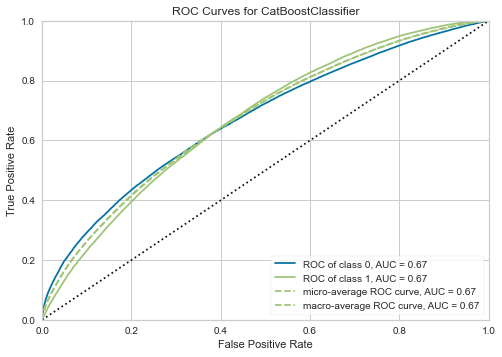

In [13]:
plot_model(cat)

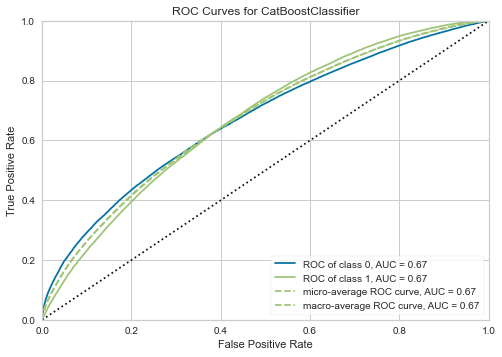

In [ ]:
plot_model(cat)